In [1]:
from IPython.display import Latex

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

pp = PdfPages('multipage.pdf')

<IPython.core.display.Latex object>

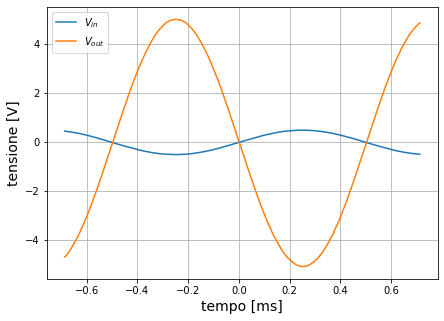

In [2]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/scope_0.csv')

w = 2*np.pi*1e3
V = lambda t, k, A, phi: k + A * np.sin(w*t - phi)

popt_in, pcov = curve_fit(V, df.second, df.Volt1)
perr_in = np.sqrt(np.diag(pcov))

popt_out, pcov = curve_fit(V, df.second, df.Volt2)
perr_out = np.sqrt(np.diag(pcov))

G = popt_out[1] / popt_in[1]
delta_G = np.hypot(popt_out[1]*perr_in[1], popt_in[1]*perr_out[1])
display(Latex(f'G = ${G:.4f} \pm {delta_G:.4f}$'))

plt.plot(df.second*1e3, df.Volt1, label="$V_{in}$")
plt.plot(df.second*1e3, df.Volt2, label="$V_{out}$")
plt.xlabel('tempo [ms]', fontsize=14)
plt.ylabel('tensione [V]', fontsize=14)
plt.legend()
plt.grid()
pp.savefig()
plt.show()

<IPython.core.display.Latex object>

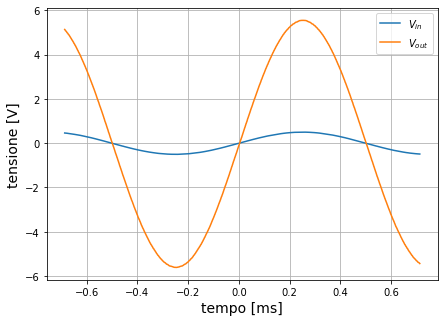

In [3]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/scope_1.csv')

w = 2*np.pi*1e3
V = lambda t, k, A, phi: k + A * np.sin(w*t - phi)

popt_in, pcov = curve_fit(V, df.second, df.Volt1)
perr_in = np.sqrt(np.diag(pcov))

popt_out, pcov = curve_fit(V, df.second, df.Volt2)
perr_out = np.sqrt(np.diag(pcov))

G = popt_out[1] / popt_in[1]
delta_G = np.hypot(popt_out[1]*perr_in[1], popt_in[1]*perr_out[1])
display(Latex(f'G = ${G:.4f} \pm {delta_G:.4f}$'))

plt.plot(df.second*1e3, df.Volt1, label="$V_{in}$")
plt.plot(df.second*1e3, df.Volt2, label="$V_{out}$")
plt.xlabel('tempo [ms]', fontsize=14)
plt.ylabel('tensione [V]', fontsize=14)
plt.legend()
plt.grid()
pp.savefig()
plt.show()

<IPython.core.display.Latex object>

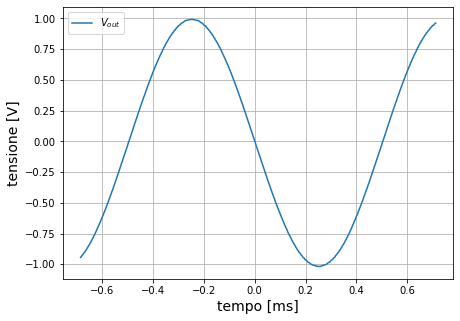

In [4]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/scope_2.csv')

w = 2*np.pi*1e3
V = lambda t, k, A, phi: k + A * np.sin(w*t - phi)

popt, pcov = curve_fit(V, df.second, df.Volt)
perr = np.sqrt(np.diag(pcov))

G = popt[1] / 0.1
delta_G = perr[1] / 0.1
display(Latex(f'G = ${G:.4f} \pm {delta_G:.4f}$'))

plt.plot(df.second*1e3, df.Volt, label="$V_{out}$")
plt.xlabel('tempo [ms]', fontsize=14)
plt.ylabel('tensione [V]', fontsize=14)
plt.legend()
plt.grid()
pp.savefig()
plt.show()

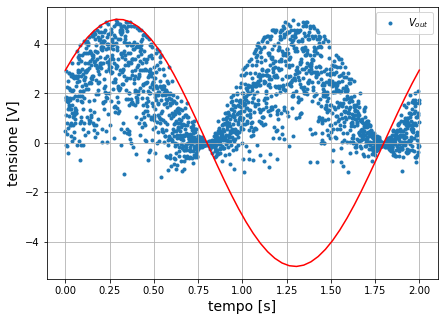

In [5]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/scope_5.csv')
df['second'] = df.second + 2

A = 0.5
G_diff = 10
w_d = 2*np.pi
t = np.linspace(0, 2)
V = A * G_diff * np.sin(w_d/2 * (t+0.2))

plt.scatter(df.second, df.Volt, marker='.', label="$V_{out}$")
plt.plot(t, V, color='r')
plt.xlabel('tempo [s]', fontsize=14)
plt.ylabel('tensione [V]', fontsize=14)
plt.legend()
plt.grid()
pp.savefig()
plt.show()

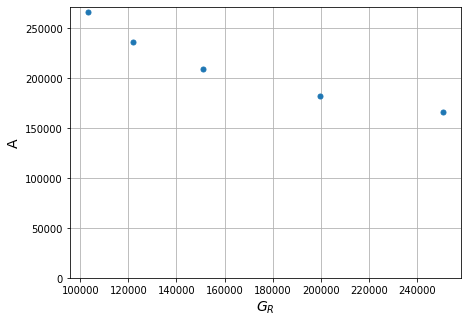

In [6]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/loop.csv')

G = df.V_out / df.V_in * 100
delta_G = np.hypot(df.V_out.values*df.dV_in, df.dV_out*df.V_in)

G_R = 2e2 + 1e5/df.R.values
A = (1/G.values - 1/G_R)**(-1)
delta_A = delta_G.values**2

plt.errorbar(G_R, A, yerr=delta_A, fmt='.', ms=10)
plt.xlabel('$G_R$', fontsize=14)
plt.ylabel('A', fontsize=14)
plt.ylim(bottom=0)
plt.grid()
pp.savefig()
plt.show()

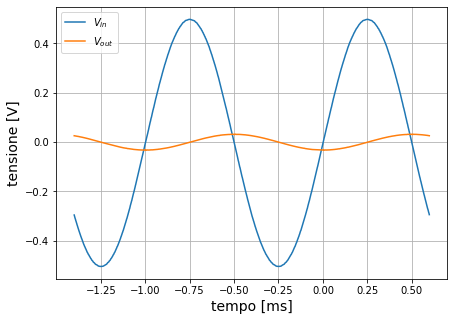

In [7]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/scope_6.csv', skiprows=1)

plt.plot(df.second*1e3, df.Volt1, label="$V_{in}$")
plt.plot(df.second*1e3, df.Volt2, label="$V_{out}$")
plt.xlabel('tempo [ms]', fontsize=14)
plt.ylabel('tensione [V]', fontsize=14)
plt.legend()
plt.grid()
pp.savefig()
plt.show()

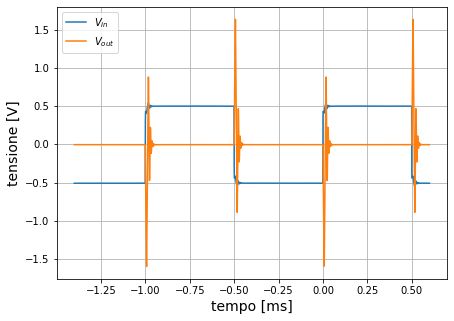

In [8]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/scope_8.csv', skiprows=1)

plt.plot(df.second*1e3, df.Volt1, label="$V_{in}$")
plt.plot(df.second*1e3, df.Volt2, label="$V_{out}$")
plt.xlabel('tempo [ms]', fontsize=14)
plt.ylabel('tensione [V]', fontsize=14)
plt.legend()
plt.grid()
pp.savefig()
plt.show()

In [9]:
pp.close()